# Twitter Data Analysis

In [40]:
#Importing required packages

import pandas as pd     
import numpy as np      
import tweepy #This is used for accessing the twitter API
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

The following snippet of code is used for connecting with my twitter account and accessing the data. The consumer keys and access tokens are unique to each account and hence I couldn't display mine.

In [1]:
'''
consumer_key = ''
consumer_secret = ''

access_token = ''
access_token_secret = ''


auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

'''

"\nconsumer_key = ''\nconsumer_secret = ''\n\naccess_token = ''\naccess_token_secret = ''\n\n\nauth = tweepy.OAuthHandler(consumer_key,consumer_secret)\nauth.set_access_token(access_token, access_token_secret)\n\napi = tweepy.API(auth)\n"

From each of the three news channels, 200 tweets are extracted.

In [3]:
bbc = api.user_timeline(screen_name="BBCWorld",count = 200)
cnn = api.user_timeline(screen_name="cnni",count = 200)
abc = api.user_timeline(screen_name="abcWNN",count = 200)

In [9]:
print("Number of tweets extracted from BBC: ",len(bbc))

Number of tweets extracted from BBC:  200


In [10]:
# Five tweets are displayed from CNN

ls = [bbc,cnn,abc]
print("5 recent tweets from abc: \n")
for tweet in abc[:5]:
    print(tweet.text)
    print()

5 recent tweets from abc: 

WATCH: A Virginia driver WRECKED his $300,000 McLaren one day after purchasing it! https://t.co/oJSNBlveFp

WATCH:  A Colorado family is alerting parents after their 3-year-old became trapped in a locked front-loading washi… https://t.co/ArLuZ55PyW

IT’S AMAZON PRIME DAY! The bargain bonanza kicks off at 3pm EDT! Retailers like Macy’s and Kohl’s are releasing the… https://t.co/m0J4LPHGBG

NEW DETAILS: Chicago police released body cam video of the fatal shooting of a black man, following protests that l… https://t.co/Evc0YTqbzm

NEW THIS MORNING: Hours before his summit with Vladimir Putin, President Trump blamed past U.S. “foolishness” for i… https://t.co/gygVbggYhC



Three new dataframes are created, each containing the tweets from ech of the three channels.

In [12]:
dfs = []
for i,j in enumerate(ls):
    df = pd.DataFrame(data = [tweet.text for tweet in j], columns=['Tweets'])
    dfs.append(df)
    
df_bbc = dfs[0]
df_cnn = dfs[1]
df_abc = dfs[2]

In [13]:
df_bbc.head()

,Tweets
0,US nuclear materials stolen last year are stil...
1,RT @BBCSport: An unusual arrival! \n\nDiego Ma...
2,Kilauea volcano: Flying lava injures 13 in Haw...
3,RT @BBCNews: 🎄🎄🎄 https://t.co/ri02D4eTkw
4,French fans give #worldcup winners a heroes' w...


In [15]:
#Internal methods for a single tweet object:
dir(bbc[2])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'author',
 'contributors',
 'coordinates',
 'created_at',
 'destroy',
 'entities',
 'favorite',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'parse',
 'parse_list',
 'place',
 'possibly_sensitive',
 'retweet',
 'retweet_count',
 'retweeted',
 'retweets',
 'source',
 'source_url',
 'text',
 'truncated',
 'user']

The following attributes for each tweet are addded to the dataframes:
Length, ID, Date, Source, Likes, Retweets


In [16]:

for i in range(3):
    dfs[i]['len'] = np.array([len(tweet.text) for tweet in ls[i]])
    dfs[i]['ID']   = np.array([tweet.id for tweet in ls[i]])
    dfs[i]['Date'] = np.array([tweet.created_at for tweet in ls[i]])
    dfs[i]['Source'] = np.array([tweet.source for tweet in ls[i]])
    dfs[i]['Likes']  = np.array([tweet.favorite_count for tweet in ls[i]])
    dfs[i]['RTs']    = np.array([tweet.retweet_count for tweet in ls[i]])

In [17]:
dfs[0].head()

,Tweets,len,ID,Date,Source,Likes,RTs
0,US nuclear materials stolen last year are stil...,79,1018989783400542208,2018-07-16 22:44:30,SocialFlow,144,159
1,RT @BBCSport: An unusual arrival! \n\nDiego Ma...,139,1018975877487579137,2018-07-16 21:49:15,TweetDeck,0,62
2,Kilauea volcano: Flying lava injures 13 in Haw...,73,1018967279093141504,2018-07-16 21:15:05,SocialFlow,149,107
3,RT @BBCNews: 🎄🎄🎄 https://t.co/ri02D4eTkw,40,1018964308032540674,2018-07-16 21:03:17,TweetDeck,0,65
4,French fans give #worldcup winners a heroes' w...,123,1018954325182304258,2018-07-16 20:23:37,SocialFlow,771,213


The average number of characters tweeted by each channel in calculated.

In [18]:
channels = ['BBC','CNN','ABC']
for index,channel in enumerate(channels):
    mean = dfs[index]['len'].mean()
    print('Mean nuumber of characters for ' + channel + ':' ,mean)

Mean nuumber of characters for BBC: 101.175
Mean nuumber of characters for CNN: 131.08
Mean nuumber of characters for ABC: 137.45


The tweet with the most number of likes and retweets for each channel is determined.

In [19]:
#Most likes and retweets

for index,channel in enumerate(channels):
    print("For " + channel + ":")
    fav_max = np.max(dfs[index]['Likes'])
    rt_max  = np.max(dfs[index]['RTs'])
    fav = dfs[index][dfs[index].Likes == fav_max].index[0]
    rt  = dfs[index][dfs[index].RTs == rt_max].index[0]
    # Max FAVs:
    print("The tweet with most likes is: \n{}".format(dfs[index]['Tweets'][fav]))
    print("Number of likes: {}".format(fav_max))
    print("{} characters.\n".format(dfs[index]['len'][fav]))

    # Max RTs:
    print("The tweet with most retweets is: \n{}".format(dfs[index]['Tweets'][rt]))
    print("Number of retweets: {}".format(rt_max))
    print("{} characters.\n".format(dfs[index]['len'][rt]))
    print("-----------------------------------------------------------------")
    


For BBC:
The tweet with most likes is: 
The #ThaiCaveRescue boys made a video - and there's one thing on their minds 🍔🍖🍚

https://t.co/ItRHFs3NYd https://t.co/goRYTyRJ9e
Number of likes: 19356
129 characters.

The tweet with most retweets is: 
RT @BBCNews: Thousands join #TrumpProtest in London's Regent Street as #TrumpVisitUK continues

Follow our coverage: https://t.co/BlLsEwC8Y…
Number of retweets: 14980
140 characters.

-----------------------------------------------------------------
For CNN:
The tweet with most likes is: 
Homeland Security Secretary Kirstjen Nielsen warns state officials that the threat from Russia targeting US electio… https://t.co/FUP6N22yU4
Number of likes: 1292
140 characters.

The tweet with most retweets is: 
RT @cnnsport: Before Paul Pogba's goal, a player hadn't scored from outside the box in a World Cup final for 36 years. 

Kylian Mbappé did…
Number of retweets: 1448
139 characters.

-----------------------------------------------------------------
For 

## Visualizations 

A visulaization to understand how the trend of likes and retweets change over time is generated for each channel.

For BBC


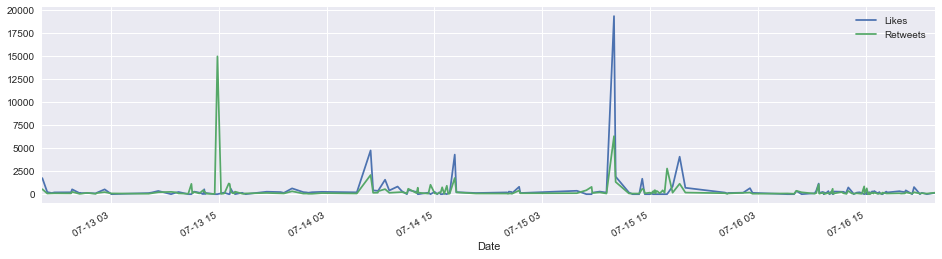

----------------------------------------------------------
For CNN


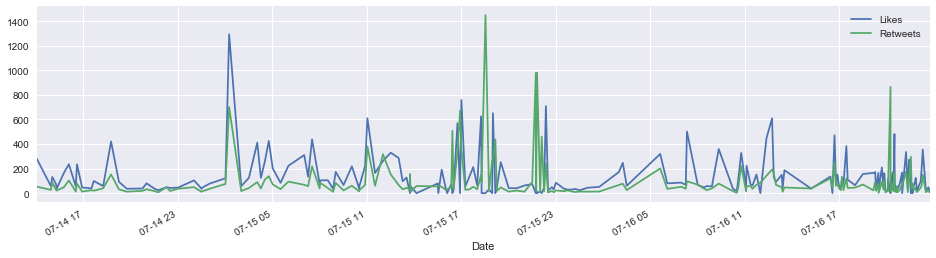

----------------------------------------------------------
For ABC


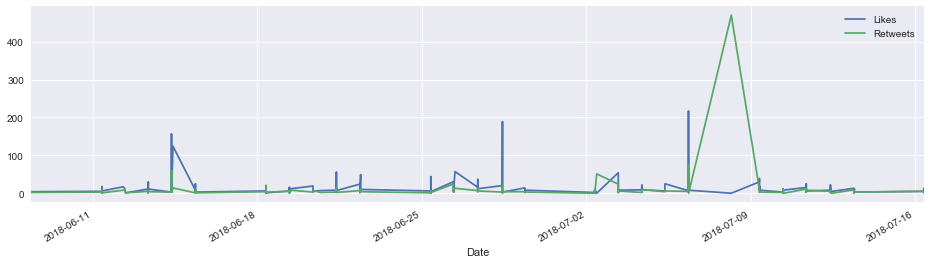

----------------------------------------------------------


In [20]:
# A time series is created here for the tweets

for i,channel in enumerate(channels):
    tlen = pd.Series(data=dfs[i]['len'].values, index=dfs[i]['Date'])
    tfav = pd.Series(data=dfs[i]['Likes'].values, index=dfs[i]['Date'])
    tret = pd.Series(data=dfs[i]['RTs'].values, index=dfs[i]['Date'])

    print('For '+ channel)
    tfav.plot(figsize=(16,4), label="Likes", legend=True)
    tret.plot(figsize=(16,4), label="Retweets", legend=True)
    plt.show()             
    print('----------------------------------------------------------')

### Pie Chart of sources

The different sources from which the tweets are tweeted are determined and plotted in a pie chart.

In [24]:
#All the tweets are combined first
combined = dfs[0].append(dfs[1], ignore_index=True)
combined = combined.append(dfs[2], ignore_index=True)
combined.head()

,Tweets,len,ID,Date,Source,Likes,RTs
0,US nuclear materials stolen last year are stil...,79,1018989783400542208,2018-07-16 22:44:30,SocialFlow,144,159
1,RT @BBCSport: An unusual arrival! \n\nDiego Ma...,139,1018975877487579137,2018-07-16 21:49:15,TweetDeck,0,62
2,Kilauea volcano: Flying lava injures 13 in Haw...,73,1018967279093141504,2018-07-16 21:15:05,SocialFlow,149,107
3,RT @BBCNews: 🎄🎄🎄 https://t.co/ri02D4eTkw,40,1018964308032540674,2018-07-16 21:03:17,TweetDeck,0,65
4,French fans give #worldcup winners a heroes' w...,123,1018954325182304258,2018-07-16 20:23:37,SocialFlow,771,213


In [25]:
# We obtain all possible sources:

sources = []
for source in combined['Source']:
    if source not in sources:
        sources.append(source)
print('Different sources are:\n')
for i in sources:
    print('*',i)        


Different sources are:

* SocialFlow
* TweetDeck
* SnappyTV.com
* Media Studio


In [26]:
#A pie chart is plotted

percent = np.zeros(len(sources))

for source in combined['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass
    
percent /= 600        

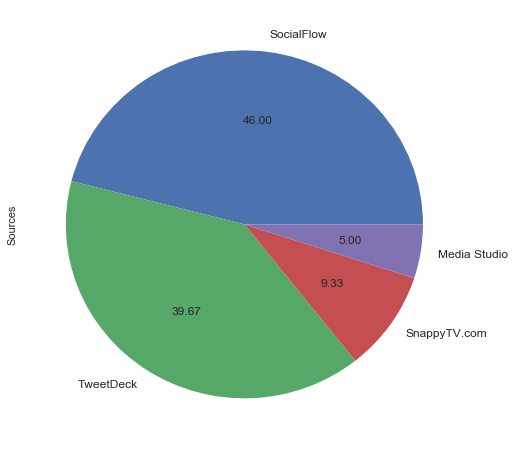

In [27]:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(figsize=(8,8),fontsize=12,autopct='%.2f')


In [28]:
pie_chart

SocialFlow      0.460000
TweetDeck       0.396667
SnappyTV.com    0.093333
Media Studio    0.050000
Name: Sources, dtype: float64

## Sentimental Analysis

The tweets are first cleaned. Regular expression is used to remove special characters, links, etc. from the tweets

In [31]:
import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


Textblob is used to perform sentimental analysis on the tweets. A polarity value of 0 indicates a neutral tweet, a value greater than 0 indicates a positive tweet, and a value less than 0 indicates a negative tweet.

In [32]:
from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1    

In [34]:
#Adding a new column to the dataframes that contain the polarity value.
for i in range(3):
    dfs[i]['SA'] = np.array([analyze_sentiment(tweet) for tweet in dfs[i]['Tweets']])

In [35]:
dfs[1].head()

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,"LIVE NOW: @AndersonCooper from Helsinki, Finla...",140,1018989611035525121,2018-07-16 22:43:49,SocialFlow,19,6,1
1,US President Trump clashes with his intelligen...,122,1018988655908704256,2018-07-16 22:40:02,SocialFlow,48,26,0
2,Here are five takeaways from the Trump-Putin H...,108,1018986143956815873,2018-07-16 22:30:03,SocialFlow,21,8,0
3,"""This was the day an American president stood ...",140,1018983146631647232,2018-07-16 22:18:08,SocialFlow,355,149,-1
4,Warren Buffett just gave $3.4 billion to chari...,96,1018981923740319744,2018-07-16 22:13:17,SocialFlow,182,59,0


The positive, negative, and neutral tweets are isolated for each channel.

In [36]:
pb,pc,pa,ub,uc,ua,nb,nc,na = [],[],[],[],[],[],[],[],[]

pos_tweets=[pb,pc,pa]
neu_tweets=[ub,uc,ua]
neg_tweets=[nb,nc,na]
for i in range(3):
    pos_tweets[i] = [tweet for index,tweet in enumerate(dfs[i]['Tweets']) if dfs[i]['SA'][index] > 0]
    neu_tweets[i] = [tweet for index,tweet in enumerate(dfs[i]['Tweets']) if dfs[i]['SA'][index] == 0]
    neg_tweets[i] = [tweet for index,tweet in enumerate(dfs[i]['Tweets']) if dfs[i]['SA'][index] < 0]

In [38]:
print("Final Results: \n")
pos,neg,neu=[],[],[]

for i,channel in enumerate(channels):
    print('For ' + channel + ':')
    
    a = len(pos_tweets[i])*100/len(dfs[i])
    print("Positive Tweets: ",a)
    pos.append(a)
    
    b = len(neg_tweets[i])*100/len(dfs[i])
    print("Negative Tweets: ",b)
    neg.append(b)
    
    c = len(neu_tweets[i])*100/len(dfs[i])
    print("Neutral Tweets: ",c)
    neu.append(c)
    print('\n')
    

Final Results: 

For BBC:
Positive Tweets:  32.5
Negative Tweets:  14.5
Neutral Tweets:  53.0


For CNN:
Positive Tweets:  41.5
Negative Tweets:  14.5
Neutral Tweets:  44.0


For ABC:
Positive Tweets:  50.0
Negative Tweets:  23.5
Neutral Tweets:  26.5




A visualization of the distribution of the different kinds of tweets for each channel is generated. 

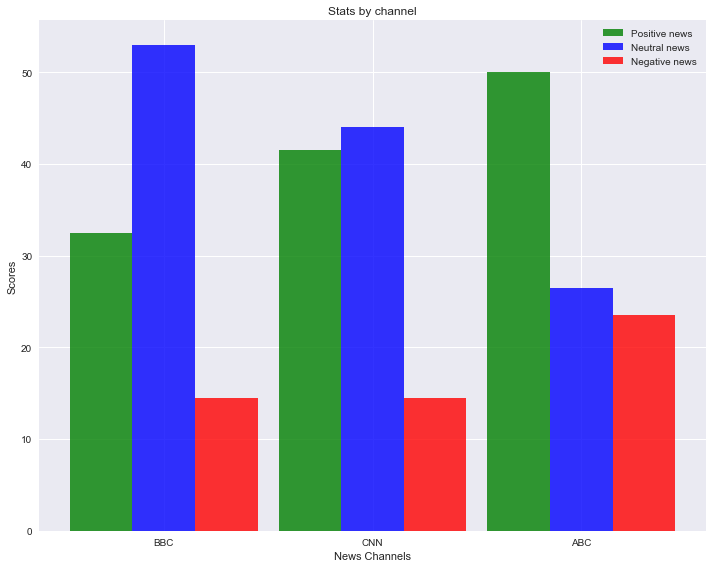

In [39]:
n_groups = 3
 
plt.figure(figsize=(10,8))
index = np.arange(n_groups)
bar_width = 0.30
opacity = 0.8
 
rects1 = plt.bar(index, pos, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Positive news')
 
rects2 = plt.bar(index + bar_width, neu, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Neutral news')


rects2 = plt.bar(index + 2*bar_width, neg, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Negative news')

plt.xlabel('News Channels')
plt.ylabel('Scores')
plt.title('Stats by channel')
plt.xticks(index + bar_width, ('BBC', 'CNN', 'ABC'))
plt.legend()
 
plt.tight_layout()
plt.show()

It can be seen from the above results that more than 50% of tweets from ABC contain positive news and only around 23% of them are negative. So to summarise, if you want your news feed to get you in a good mood, ABC is the channel to follow!